In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import math

In [4]:
data=pd.read_csv('~\Downloads\daily_data.csv')
data

,datetime,high,low,close,open,volume
0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076
1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340
2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601
3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561
4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333
...,...,...,...,...,...,...
1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870
1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660
1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360
1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280


In [5]:
output = pd.read_csv('ichimoku.csv')
output

,Unnamed: 0,datetime,high,low,close,open,volume,signal
0,0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076,0
1,1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340,0
2,2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601,0
3,3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561,0
4,4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333,0
...,...,...,...,...,...,...,...,...
1468,1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870,-1
1469,1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660,-1
1470,1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360,-1
1471,1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280,-1


In [79]:
def to_submit(data,output):
    datetime=[]
    trade=[]
    signal=[]
    price=[]
    current=0
    for i in range(len(data.close)):
        if(i==(len(data.close)-1)):
            if(current==1):
                datetime.append(output.datetime[i])
#                 price.append(data.close[i])
                trade.append('close')
                signal.append(-1)
            elif(current==-1):
                datetime.append(output.datetime[i])
#                 price.append(data.close[i])
                trade.append('close')
                signal.append(1)
            else:
                break
            break
        if(output.signal[i]==1):
            if(current==1):
                datetime.append(output.datetime[i])
                trade.append('close')
#                 price.append(data.close[i])
                signal.append(0)
            elif(current==0):
                datetime.append(output.datetime[i])
#                 price.append(data.close[i])
                trade.append('close')
                signal.append(1)
                current=1
            else:
                datetime.append(output.datetime[i])
                trade.append('close')
#                 price.append(data.close[i])
                signal.append(1)
                current=0
            
        elif(output.signal[i]==-1):
            if(current==1):
                datetime.append(output.datetime[i])
                signal.append(-1)
#                 price.append(data.close[i])
                trade.append('close')
                current=0
            elif(current==0):
                datetime.append(output.datetime[i])
                trade.append('close')
#                 price.append(data.close[i])
                signal.append(-1)
                current=-1
            else:
                datetime.append(output.datetime[i])
                trade.append('close')
#                 price.append(data.close[i])
                signal.append(0)
                current=-1
        
        else:
            datetime.append(output.datetime[i])
            trade.append('close')
#             price.append(data.close[i])
            signal.append(0)
        
            
#     return signal        
    to_submit=pd.DataFrame(columns=['datetime'])
    to_submit['datetime']=datetime
    to_submit['open']=data.open
    
    to_submit['high']=data.high
    to_submit['low']=data.low
    to_submit['close']=data.close
    to_submit['volume']=data.volume
    
    to_submit['close\open']=trade
#     to_submit['price']=price
    to_submit['signal']=signal

    return to_submit
            
            

In [57]:
def trailing_stop_loss(data,submit):
    datetime=[]
    trade=[]
    signal=[]
    percent=0.08
    count=0
    hello=0
    stop_loss=0
    current=0
    l=-1
    for i in range(len(submit.datetime)):
        datetime.append(submit.datetime[i])
        trade.append('cloase')
        if(i<=l):
            continue
        if(hello==0):
            if(submit.signal[i]==0):
                signal.append(0)
            elif(submit.signal[i]==1):
                hello=1
                current=data.close[i]
                stop_loss=((1-percent)*current)
                signal.append(1)
                
            else:
                hello=-1
                current=data.close[i]
                stop_loss=((1+percent)*current)
                signal.append(-1)          
                
        elif(hello==1):
            if(submit.signal[i]==-1):

                    hello=0
                    signal.append(-1)
                    stop_loss=0
                    
            elif(submit.signal[i]==0):
                if(data.close[i]>current):
                    current=data.close[i]
                    stop_loss=((1-percent)*current)
                    signal.append(0)
            
                    
                elif(data.close[i]<=stop_loss):
                    signal.append(-1)
                    count=count+1
                    stop_loss=0
                    hello=0
                    for j in range(i+1,len(submit.datetime)):
                        if(submit.signal[j]==-1):
                            signal.append(0)
                            l=j
                            break
                        signal.append(0)
                
                else:
                    signal.append(0)
                        
            
            
        else:#hello=-1
            if(submit.signal[i]==1):
                    signal.append(1)
                    stop_loss=0
                    hello=0
                    
            elif(submit.signal[i]==0):
                if(data.close[i]<current):
                    current=data.close[i]
                    stop_loss=((1+percent)*data.close[i])
                    signal.append(0)
                
                    
                elif(data.close[i]>=stop_loss):
                    signal.append(1)
                    count=count+1
                    stop_loss=0
                    hello=0
                    for j in range(i+1,len(submit.datetime)):
                        if(submit.signal[j]==1):
                            signal.append(0)
                            l=j
                            break
                        signal.append(0)   
                        
                else:
                    signal.append(0)
                
                
            
    print("Number of Times Stop Loss encountered: ",count)  
#     return signal   
    to_submit=pd.DataFrame(columns=['datetime'])
    to_submit['datetime']=datetime
    to_submit['open']=data.open
    
    to_submit['high']=data.high
    to_submit['low']=data.low
    to_submit['close']=data.close
    to_submit['volume']=data.volume
    
    to_submit['close\open']=trade
#     to_submit['price']=price
    to_submit['signal']=signal

    return to_submit 
            
            
    

In [58]:
def dd_long_short(trade_type,close):
    
    if trade_type == 'Long then short':
        cumulative_max_values = close.cummax()
        cumulative_returns = close/ cumulative_max_values - 1
        max_drawdown = cumulative_returns.min()
        return max_drawdown
        
    elif trade_type == 'Short then long':
        pip=[]
        for i in close:
            pip.append(i)
        stock = -(1000 /pip[0])
        portfolio = []

        for i in range(len(pip)):
            profit = stock * (pip[i] - pip[0])
            portfolio.append(1000+profit)
        
        drawdown = []
        new = 0

        for i in range(len(portfolio)):
            new = max(new,portfolio[i])
            drawdown.append(((new-portfolio[i])/new))
            
        return np.max(drawdown)

def metrics(data,submit):
    capital=1000
    current=0
    temp=0
    portfolio_value=[]
    datetime=[]
    quantity=[]
    
    sharpe=[]
    returns=[]
    risk_free_rate=0.05       
    for i in range(len(data.close)):
        datetime.append(data.datetime[i])
        if(submit.signal[i]==1):
            if(current==0):
                portfolio_value.append(capital)
                returns.append((capital-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
                
                temp=capital/(data.close[i])
                quantity.append(temp)
                capital=0
                current=1
            else:
                capital=capital-(temp*data.close[i])
                returns.append((capital-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
                quantity.append(temp)
                portfolio_value.append(capital)
                temp=0
                current=0
                
        elif(submit.signal[i]==-1):
            if(current==0):
                portfolio_value.append(capital)
                temp=capital/(data.close[i])
                quantity.append(temp)
                returns.append((capital-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
                capital=capital+(temp*data.close[i])
                
                current=-1
            else:
                capital=capital+(temp*data.close[i])
                quantity.append(temp)
                current=0
                temp=0
                portfolio_value.append(capital)
                returns.append((capital-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
        
        else:
            if(current==0):
                portfolio_value.append(capital)
                quantity.append(temp)
                returns.append((capital-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
            elif(current==1):
                portfolio_value.append(capital+(temp*data.close[i]))
                quantity.append(temp)
                returns.append((capital+(temp*data.close[i])-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
            else:
                portfolio_value.append(capital-(temp*data.close[i]))
                quantity.append(temp)
                returns.append((capital-(temp*data.close[i])-1000)/10)
                sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
                
    a=pd.DataFrame(columns=['datetime','portfolio value'])
    a['datetime']=datetime
    a['portfolio value']=portfolio_value
#     a['sharpe']=sharpe
    a['quantity']=quantity
    
#     a['daily_return'] = a['portfolio value'].pct_change()
#     daily_volatility = a['daily_return'].std()
#     annual_volatility = daily_volatility * math.sqrt(252)
#     risk_free_rate = 0.03
    
#     a['excess_return'] = a['daily_return'] - risk_free_rate / 252
#     cumulative_excess_return = a['excess_return'].sum()
#     negative_returns = [r for r in a['excess_return'] if r < 0]
#     cumulative_volatility = a['daily_return'].std() * math.sqrt(252)
#     hello=np.std(negative_returns)*math.sqrt(252)
#     sharpe_ratio = cumulative_excess_return / cumulative_volatility
#     sortino_ratio=cumulative_excess_return / hello

    a=pd.DataFrame(columns=['datetime','portfolio value'])
    a['datetime']=datetime
    a['portfolio value']=portfolio_value
    a['quantity']=quantity
    a['daily_return'] = a['portfolio value'].pct_change()
    daily_volatility = a['daily_return'].std()
    annual_volatility = daily_volatility * math.sqrt(365)
    annual_volatility_negative = a[a['daily_return'] < 0]['daily_return'].std() * math.sqrt(365)
    risk_free_rate = 0.05
    a['excess_return'] = (a['daily_return'] - risk_free_rate)
    annual_excess_return = (a['daily_return'].mean()*365 - risk_free_rate)
    cumulative_excess_return = a['excess_return'].sum()
    negative_returns = [r for r in a['excess_return'] if r < 0]
    cumulative_volatility = a['daily_return'].std()*math.sqrt(252)
    hello=np.std(negative_returns)*math.sqrt(252)
    sharpe_ratio = annual_excess_return / annual_volatility
    sortino_ratio = annual_excess_return / annual_volatility_negative
    
    
    trade_type=[]
    start=[]
    end=[]
    start_value=[]
    end_value=[]
    duration=[]
    P_and_L=[]
    return_for_every_trade=[]
    pointer=0
    drawdown=[]
    for i in range(len(submit.signal)):
        if(submit.signal[i]==1):
            if(pointer==0):
                trade_type.append('long')
                start.append(i)
                start_value.append(portfolio_value[i])
                pointer=1
            else:
                end.append(i)
                end_value.append(portfolio_value[i])
                return_for_every_trade.append(100*((end_value[-1]/start_value[-1])-1))
                P_and_L.append(end_value[-1]-start_value[-1])
                duration.append(end[-1]-start[-1])
                pointer=0
                
                drawdown.append(dd_long_short('Short then long',data.close[start[-1]:end[-1]]))
#                 drawdown.append(100*((portfolio_value[start[-1]]/minimum)-1))
                
        elif(submit.signal[i]==-1):
            if(pointer==0):
                trade_type.append('short')
                start.append(i)
                start_value.append(portfolio_value[i])
                pointer=-1
            else:
                end.append(i)
                end_value.append(portfolio_value[i])
                return_for_every_trade.append(100*((end_value[-1]/start_value[-1])-1))
                P_and_L.append(end_value[-1]-start_value[-1])
                duration.append(end[-1]-start[-1])
                pointer=0
                
                drawdown.append(dd_long_short('Long then short',data.close[start[-1]:end[-1]]))
                
    b=pd.DataFrame(columns=['start','end'])
    b['start']=start
    b['end']=end
    b['duration']=duration
    b['return for every trade']=return_for_every_trade
    b['P and L']=P_and_L
    b['drawdown']=drawdown
    b['trade type']=trade_type
    

    gross_profit=[]
    gross_loss=[]
    for i in range(len(P_and_L)):
        if(P_and_L[i]>0):
            gross_profit.append(P_and_L[i])
        else:
            gross_loss.append(P_and_L[i])
    print("GROSS PROFIT: ",np.sum(gross_profit))
    print("GROSS LOSS: ",np.sum(gross_loss))
    print("NET P and L: ",np.sum(P_and_L))
    print("TOTAL CLOSED TRADES: ",len(start))
    print("WIN RATE: ",100*(len(gross_profit)/(len(gross_profit)+len(gross_loss))))
    print("AVG WINNING TRADE: ",np.mean(gross_profit))
    print("AVG LOSING TRADE: ",np.mean(gross_loss))
    print("Largest Losing trade: ",min(gross_loss))
    print("Largest winning trade: ",max(gross_profit))
    print("Avg holding duration: ",np.mean(duration))
    
   
    
    print("Sharpe Ratio: ",sharpe_ratio)


#     std_dev_negative = np.std(negative_returns)
            
    print("Sortino Ratio: ",sortino_ratio)
    print("RETURNS: ",((np.sum(P_and_L))/10))
    print("MAX Drawdown: (in %) ",100*np.min(drawdown))
    plt.plot(portfolio_value)
    return a,b
                

C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))


GROSS PROFIT:  9945.94658806927
GROSS LOSS:  -2519.4681431989557
NET P and L:  7426.478444870313
TOTAL CLOSED TRADES:  26
WIN RATE:  50.0
AVG WINNING TRADE:  765.0728144668669
AVG LOSING TRADE:  -193.80524178453504
Largest Losing trade:  -1091.2478498687933
Largest winning trade:  3982.2219282943106
Avg holding duration:  53.15384615384615
Sharpe Ratio:  1.0694442959007024
Sortino Ratio:  1.4366515351679083
RETURNS:  742.6478444870313
MAX Drawdown: (in %)  -31.00301393919912


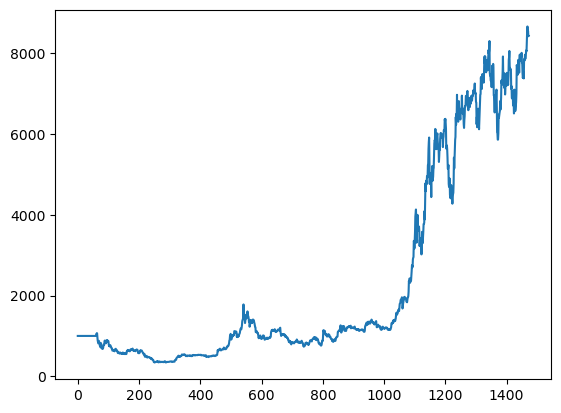

In [59]:
daily_metrics,only_trade=metrics(data,to_submit(data,output))

In [60]:
daily_metrics

,datetime,portfolio value,quantity,daily_return,excess_return
0,2018-01-01,1000.000000,0.000000,NaN,NaN
1,2018-01-02,1000.000000,0.000000,0.000000,-0.050000
2,2018-01-03,1000.000000,0.000000,0.000000,-0.050000
3,2018-01-04,1000.000000,0.000000,0.000000,-0.050000
4,2018-01-05,1000.000000,0.000000,0.000000,-0.050000
...,...,...,...,...,...
1468,2022-01-08,8659.442772,0.116764,0.014054,-0.035946
1469,2022-01-09,8509.148216,0.116764,-0.017356,-0.067356
1470,2022-01-10,8551.464499,0.116764,0.004973,-0.045027
1471,2022-01-11,8417.137360,0.116764,-0.015708,-0.065708


In [61]:
only_trade

,start,end,duration,return for every trade,P and L,drawdown,trade type
0,60,72,12,-24.379674,-243.796740,-0.236513,long
1,73,113,40,-15.813315,-119.580806,0.244210,short
2,116,141,25,-11.011939,-70.104478,-0.175425,long
3,142,197,55,1.791027,10.146489,0.096067,short
4,198,219,21,-15.681957,-90.432274,-0.162692,long
5,223,245,22,-15.568103,-75.697129,0.193239,short
6,246,255,9,-11.903458,-48.867868,-0.159246,long
7,256,413,157,39.785426,143.890834,0.095039,short
8,414,567,153,160.579187,811.820970,-0.310030,long
9,568,582,14,-16.216982,-213.639112,0.223161,short


In [62]:

def only_long_then_short(data,output):
    datetime=[]
    signal=[]
    trade=[]
    price=[]
    current=0
    for i in range(len(data.close)):
        datetime.append(data.datetime[i])
        trade.append('close')
#         price.append(data.close[i])
        if(i==len(data.close)-1):
            if(current==1):
                signal.append(-1)
                break
            else:
                signal.append(0)
                break
            
        
        if(output.signal[i]==1):
            if(current==0):
                signal.append(1)
                current=1
            else:
                signal.append(0)
        elif(output.signal[i]==-1):
            if(current==1):
                signal.append(-1)
                current=0
            else:
                signal.append(0)
            
        else:
            if(current==0):
                signal.append(0)
            else:
                signal.append(0)
    a=pd.DataFrame(columns=['datetime','signal','trade','price'])
    a['price']=price
    a['datetime']=datetime
    a['signal']=signal
    a['trade']=trade
    return a
            

C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))


GROSS PROFIT:  7930.259038264578
GROSS LOSS:  -882.0352772210439
NET P and L:  7048.223761043534
TOTAL CLOSED TRADES:  13
WIN RATE:  53.84615384615385
AVG WINNING TRADE:  1132.894148323511
AVG LOSING TRADE:  -147.00587953684064
Largest Losing trade:  -243.79674041864382
Largest winning trade:  4954.530673118177
Avg holding duration:  56.30769230769231
Sharpe Ratio:  1.16501001621746
Sortino Ratio:  1.114139535903099
RETURNS:  704.8223761043535
MAX Drawdown: (in %)  -31.00301393919912


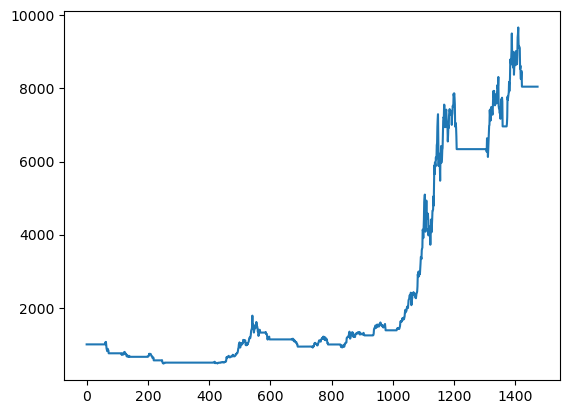

In [63]:
only_long_then_short_daily,only_long_then_short_trade=metrics(data,only_long_then_short(data,output))

In [64]:
only_long_then_short_daily,

(        datetime  portfolio value  quantity  daily_return  excess_return
 0     2018-01-01      1000.000000       0.0           NaN            NaN
 1     2018-01-02      1000.000000       0.0           0.0          -0.05
 2     2018-01-03      1000.000000       0.0           0.0          -0.05
 3     2018-01-04      1000.000000       0.0           0.0          -0.05
 4     2018-01-05      1000.000000       0.0           0.0          -0.05
 ...          ...              ...       ...           ...            ...
 1468  2022-01-08      8048.223761       0.0           0.0          -0.05
 1469  2022-01-09      8048.223761       0.0           0.0          -0.05
 1470  2022-01-10      8048.223761       0.0           0.0          -0.05
 1471  2022-01-11      8048.223761       0.0           0.0          -0.05
 1472  2022-01-12      8048.223761       0.0           0.0          -0.05
 
 [1473 rows x 5 columns],)

In [65]:
only_long_then_short_trade

,start,end,duration,return for every trade,P and L,drawdown,trade type
0,60,72,12,-24.379674,-243.796740,-0.236513,long
1,113,141,28,-12.714922,-96.150652,-0.175425,long
2,197,219,22,-14.706875,-97.073115,-0.162692,long
3,245,255,10,-11.012376,-61.997418,-0.159246,long
4,413,567,154,163.875950,820.989133,-0.310030,long
5,582,597,15,-14.051293,-185.754052,-0.152835,long
6,669,689,20,-17.361408,-197.263300,-0.132234,long
7,736,788,52,6.245824,58.645409,-0.146222,long
8,828,907,79,24.888995,248.292427,-0.141725,long
9,935,976,41,11.170134,139.167777,-0.085299,long


Number of Times Stop Loss encountered:  25


C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))
C:\Users\tanus\AppData\Local\Temp\ipykernel_27772\4223755451.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe.append((np.mean(returns)-risk_free_rate)/(np.std(returns)))


GROSS PROFIT:  1878.4234821387045
GROSS LOSS:  -1043.702849487172
NET P and L:  834.7206326515325
TOTAL CLOSED TRADES:  26
WIN RATE:  34.61538461538461
AVG WINNING TRADE:  208.71372023763382
AVG LOSING TRADE:  -61.394285263951296
Largest Losing trade:  -229.79828325538392
Largest winning trade:  492.69712488719006
Avg holding duration:  16.653846153846153
Sharpe Ratio:  0.46241053758256473
Sortino Ratio:  0.36450166411437646
RETURNS:  83.47206326515325
MAX Drawdown: (in %)  -7.9778775288720905


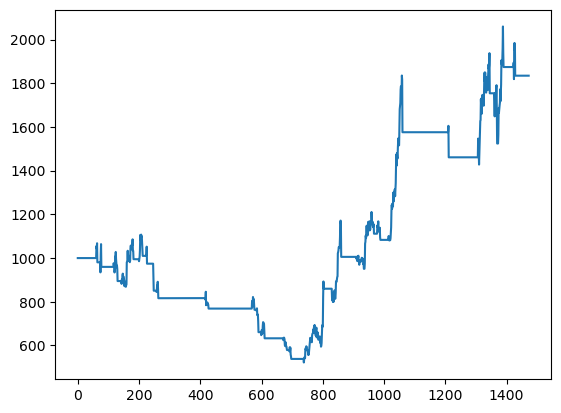

In [66]:
daily_metrics,only_trade=metrics(data,trailing_stop_loss(data,to_submit(data,output)))

In [67]:
daily_metrics

,datetime,portfolio value,quantity,daily_return,excess_return
0,2018-01-01,1000.000000,0.0,NaN,NaN
1,2018-01-02,1000.000000,0.0,0.0,-0.05
2,2018-01-03,1000.000000,0.0,0.0,-0.05
3,2018-01-04,1000.000000,0.0,0.0,-0.05
4,2018-01-05,1000.000000,0.0,0.0,-0.05
...,...,...,...,...,...
1468,2022-01-08,1834.720633,0.0,0.0,-0.05
1469,2022-01-09,1834.720633,0.0,0.0,-0.05
1470,2022-01-10,1834.720633,0.0,0.0,-0.05
1471,2022-01-11,1834.720633,0.0,0.0,-0.05


In [68]:
only_trade

,start,end,duration,return for every trade,P and L,drawdown,trade type
0,60,64,4,-1.943540,-19.435398,-0.012163,long
1,73,77,4,-2.128723,-20.873500,0.046903,short
2,116,130,14,-6.759478,-64.870111,-0.076727,long
3,142,182,40,11.193550,100.162234,0.064666,short
4,198,212,14,1.514952,15.073515,-0.063366,long
5,223,226,3,-3.535732,-35.712897,0.000000,short
6,246,248,2,-12.686004,-123.605301,-0.059038,long
7,256,263,7,-4.044952,-34.411970,0.035295,short
8,414,427,13,-5.813135,-47.454167,-0.072791,long
9,568,577,9,-0.729545,-5.609272,0.053144,short


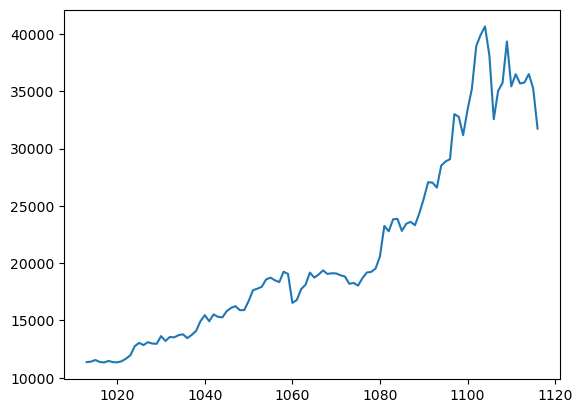

In [35]:
plt.plot(data.close[1013:1117])

In [84]:
#static approach
def dd_long_short(trade_type,close):
    
    if trade_type == 'Long then short':
        cumulative_max_values = close.cummax()
        cumulative_returns = close/ cumulative_max_values - 1
        max_drawdown = cumulative_returns.min()
        return max_drawdown
        
    elif trade_type == 'Short then long':
        pip=[]
        for i in close:
            pip.append(i)
        stock = -(1000 /pip[0])
        portfolio = []

        for i in range(len(pip)):
            profit = stock * (pip[i] - pip[0])
            portfolio.append(1000+profit)
        
        drawdown = []
        new = 0

        for i in range(len(portfolio)):
            new = max(new,portfolio[i])
            drawdown.append(((new-portfolio[i])/new))
            
        return np.max(drawdown)




def metrics(data,output):
    PL=[]
    PL_in_percent=[]
    hello=0
    number_of_stock=[]
    capital=1000
    entry=[]
    exit=[]
    exit_index=[]
    entry_index=[]
    holding_duration=[]
    drawdown=[]
    
    commision_rate=1
    risk_free_rate=0.05
    
    for i in range(len(data.close)):
        if(output.signal[i]==1):
            if(hello==0):
                hello=1
                entry_index.append(i)
                entry.append(data.datetime[i])
                
                number_of_stock=(capital)/(data.close[i])
                capital=0
            else:
                hello=0
                exit_index.append(i)
                exit.append(data.datetime[i])
                holding_duration.append(exit_index[-1]-entry_index[-1])
                capital=(capital-(number_of_stock)*(data.close[i]))
                x=entry_index[-1]
#                 if x in data.close.index and i+1 in data.close.index:
                drawdown.append(dd_long_short('Short then long',data.close[x:i+1]))
                    
    
                number_of_stock=0
                PL.append(capital-1000)
                PL_in_percent.append((capital-1000)/10)
                capital=1000
                
        elif(output.signal[i]==-1):
            if(hello==0):
                hello=-1
                
                entry_index.append(i)
                entry.append(data.datetime[i])
                number_of_stock=(capital/(data.close[i]))
                capital=capital+(number_of_stock)*(data.close[i])
            else:
                hello=0
                exit_index.append(i)
                exit.append(data.datetime[i])
                holding_duration.append(exit_index[-1]-entry_index[-1])
                capital=capital+(number_of_stock)*(data.close[i])
                x=entry_index[-1]
                drawdown.append(dd_long_short('Long then short',(data.close[x:i+1])))
                    
                number_of_stock=0
                PL.append(capital-1000)
                PL_in_percent.append((capital-1000)/10)
                capital=1000
                
                
        
    index=[]            
    for i in range(len(PL)):
        index.append(i)
    a=pd.DataFrame(columns=['trade number','entry','exit','holding duration','return','return %'])
    
    a['trade number']=index
    a['entry']=entry
    a['exit']=exit
    a['holding duration']=holding_duration
    a['return']=PL
    a['return %']=PL_in_percent
    a['drawdown']=drawdown
                
    profit=[]
    loss=[]
    for i in range(len(PL)):
        if(PL[i]>0):
            profit.append(PL[i])
        else:
            loss.append(PL[i])
    print("Total Closed trades: ",len(PL))
    print("Winning trades: ",(len(profit)))
    print("Losing Trades: ",(len(PL)-len(profit)))
    number_of_stock=(1000/(data.close[0]))
    bench_mark_return=(number_of_stock)*(data.close[len(data.close)-1])
    bench_mark_return=(bench_mark_return-1000)
    print("Benchmark Return: ",bench_mark_return)
    print("WIN rate: ",(100*len(profit))/len(PL) , " %")
    print("Gross Profit: ",np.sum(PL))
    net_profit=(np.sum(PL)-(len(PL)*(commision_rate)))
    print("Net Profit: ",net_profit)
    print("Average Profit: ",net_profit/(len(PL)))
    print("MAX Drawdowns: ", (100*(np.min(drawdown)))," %")
    print("Largest Win: ", np.max(profit))
    print("Average Win: ",(np.mean(profit)))
   
   
    print("Largest Loss: ",np.min(loss))
    print("Average Loss: ",np.mean(loss))
    print("Maximum Holding Time: ",np.max(holding_duration))
    print("Average Holding Duration: ",((np.sum(holding_duration))/(len(holding_duration))))
    print("Sharpe Ratio: ",((np.mean(PL)-risk_free_rate)/(np.std(PL))))
    average_return = np.mean(PL)
    downside_returns = [ret for ret in PL if ret < risk_free_rate]
    downside_volatility = np.std(downside_returns)
    
    sortino_ratio = (average_return - risk_free_rate) / downside_volatility
    print("Sortino Ratio: ", sortino_ratio )
    
   
    print("returns: ",((np.sum(PL)/(10*len(PL))))," %")
    
    return a         
            
    

In [85]:
a=metrics(data,to_submit(data,output))

Total Closed trades:  26
Winning trades:  13
Losing Trades:  13
Benchmark Return:  2248.9531785306435
WIN rate:  50.0  %
Gross Profit:  5074.112640300759
Net Profit:  5048.112640300759
Average Profit:  194.15817847310612
MAX Drawdowns:  -31.00301393919912  %
Largest Win:  3449.7158843402412
Average Win:  529.0361784465638
Largest Loss:  -243.79674041864382
Average Loss:  -138.71982150035157
Maximum Holding Time:  195
Average Holding Duration:  53.15384615384615
Sharpe Ratio:  0.2640889032922233
Sortino Ratio:  3.9467842969773255
returns:  19.51581784731061  %


In [86]:
a

,trade number,entry,exit,holding duration,return,return %,drawdown
0,0,2018-03-02,2018-03-14,12,-243.796740,-24.379674,-0.291831
1,1,2018-03-15,2018-04-24,40,-158.133153,-15.813315,0.292041
2,2,2018-04-27,2018-05-22,25,-110.119393,-11.011939,-0.175425
3,3,2018-05-23,2018-07-17,55,17.910268,1.791027,0.161085
4,4,2018-07-18,2018-08-08,21,-156.819571,-15.681957,-0.242398
5,5,2018-08-12,2018-09-03,22,-155.681032,-15.568103,0.193239
6,6,2018-09-04,2018-09-13,9,-119.034579,-11.903458,-0.159246
7,7,2018-09-14,2019-02-18,157,397.854259,39.785426,0.095039
8,8,2019-02-19,2019-07-22,153,1605.791869,160.579187,-0.310030
9,9,2019-07-23,2019-08-06,14,-162.169818,-16.216982,0.223161


In [87]:
b=metrics(data,trailing_stop_loss(data,to_submit(data,output)))

Number of Times Stop Loss encountered:  25
Total Closed trades:  26
Winning trades:  9
Losing Trades:  17
Benchmark Return:  2248.9531785306435
WIN rate:  34.61538461538461  %
Gross Profit:  873.3633017481025
Net Profit:  847.3633017481025
Average Profit:  32.59089622108086
MAX Drawdowns:  -14.17249978258539  %
Largest Win:  454.8314622562225
Average Win:  209.55782924897892
Largest Loss:  -134.12435936933514
Average Loss:  -59.56806832310047
Maximum Holding Time:  48
Average Holding Duration:  16.653846153846153
Sharpe Ratio:  0.22233560442193667
Sortino Ratio:  0.8591087178172365
returns:  3.3590896221080864  %


In [88]:
b

,trade number,entry,exit,holding duration,return,return %,drawdown
0,0,2018-03-02,2018-03-06,4,-19.435398,-1.943540,-0.081721
1,1,2018-03-15,2018-03-19,4,-21.287226,-2.128723,0.097888
2,2,2018-04-27,2018-05-11,14,-67.594782,-6.759478,-0.129622
3,3,2018-05-23,2018-07-02,40,111.935499,11.193550,0.083594
4,4,2018-07-18,2018-08-01,14,15.149517,1.514952,-0.087883
5,5,2018-08-12,2018-08-15,3,-35.357317,-3.535732,0.074007
6,6,2018-09-04,2018-09-06,2,-126.860043,-12.686004,-0.126860
7,7,2018-09-14,2018-09-21,7,-40.449525,-4.044952,0.084346
8,8,2019-02-19,2019-03-04,13,-58.131351,-5.813135,-0.091025
9,9,2019-07-23,2019-08-01,9,-7.295453,-0.729545,0.071279


In [80]:
to_submit(data,output).to_csv(r'C:\Users\tanus\Downloads\strategy.csv')

In [81]:
trailing_stop_loss(data,to_submit(data,output)).to_csv(r'C:\Users\tanus\Downloads\stop_loss_strategy.csv')

Number of Times Stop Loss encountered:  25
